In [1]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    """
    Analyzes text and returns a sentiment label based on VADER's compound score.
    """
    # Get polarity scores
    scores = sia.polarity_scores(str(text))
    compound_score = scores['compound']
    
    # Assign labels based on compound score thresholds
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# --- Main Variables ---
# Replace 'test(in).csv' with your file path
input_file = 'test(in).csv'
# The name of the column containing the message text
text_column = 'body'
# The name of the new column to store the sentiment label
output_column = 'Sentiment'


# --- Main Process ---
try:
    # 1. Load the dataset from the CSV file
    df = pd.read_csv(input_file)
    
    # 2. Apply the sentiment labeling function to the text column
    # Create a new 'Sentiment' column by applying the get_sentiment_label function
    df[output_column] = df[text_column].apply(get_sentiment_label)
    
    # 3. Display the first few rows of the result
    print(f"Sentiment Labeling Results for file: {input_file}")
    print(df[[text_column, output_column]].head(10))

    # Optional: Save the results to a new CSV file
    # output_filename = 'labeled_sentiments.csv'
    # df.to_csv(output_filename, index=False)
    # print(f"\nData with sentiment labels saved to {output_filename}")

except FileNotFoundError:
    print(f"Error: File '{input_file}' not found. Make sure the file is in the correct directory.")
except KeyError:
    print(f"Error: Column '{text_column}' not found in the file. Please check your column name.")

Sentiment Labeling Results for file: test(in).csv
                                                body Sentiment
0  EnronOptions Announcement\n\n\nWe have updated...  Positive
1  Marc,\n\nUnfortunately, today is not going to ...  Positive
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   Neutral
3  we were thinking papasitos (we can meet somewh...   Neutral
4  Since you never gave me the $20 for the last t...  Positive
5  sure, just call me the bank that delivers.\n \...  Positive
6  Inventory summaries for both MGL and MGMCC as ...   Neutral
7  Please print attachment and make sure that e:m...  Positive
8  Please advise me of your interest in Garvin's ...  Positive
9  The start time for Tuesday morning has been ch...  Negative


In [5]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Make sure you have downloaded the VADER data beforehand
# import nltk
# nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    """
    Analyzes text and returns a sentiment label based on VADER's compound score.
    """
    # Get polarity scores
    scores = sia.polarity_scores(str(text))
    compound_score = scores['compound']
    
    # Assign labels based on compound score thresholds
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# --- Main Variables ---
# Your input file name
input_file = 'test(in).csv'
# The names of the columns to be combined for analysis
subject_col = 'Subject'
body_col = 'body'
# The name of the temporary combined column for analysis
analysis_col = 'full_text'
# The name of the new column to store the sentiment label
output_col = 'Sentiment'


# --- Main Process ---
try:
    # 1. Load the dataset from the CSV file
    df = pd.read_csv(input_file)
    
    # 2. Combine the 'Subject' and 'body' columns into a single text column
    # Fill empty values (NaN) with an empty string to avoid errors
    df[subject_col] = df[subject_col].fillna('')
    df[body_col] = df[body_col].fillna('')
    df[analysis_col] = df[subject_col] + ' ' + df[body_col]

    # 3. Apply the sentiment labeling function to the combined text column
    df[output_col] = df[analysis_col].apply(get_sentiment_label)
    
    # 4. Display the first few rows of the result
    print(f"Sentiment Labeling Results for file: {input_file}")
    # Displaying the relevant columns, including the new column
    print(df[[subject_col, body_col, output_col]].head(10))

    # Optional: Save the results to a new CSV file
    # output_filename = 'labeled_sentiments.csv'
    # df.to_csv(output_filename, index=False)
    # print(f"\nData with sentiment labels saved to {output_filename}")

except FileNotFoundError:
    print(f"Error: File '{input_file}' not found. Make sure the file is in the correct directory.")
except KeyError as e:
    print(f"Error: Column {e} not found in the file. Please check your column names.")

Sentiment Labeling Results for file: test(in).csv
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   
5                                     RE: Favor   
6                        MG Inventory Summaries   
7                         Forgot the Attachment   
8       Garvin Brown - AXIA Sr. Power Scheduler   
9                   More Dallas ASE Information   

                                                body Sentiment  
0  EnronOptions Announcement\n\n\nWe have updated...  Positive  
1  Marc,\n\nUnfortunately, today is not going to ...  Positive  
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   Neutral  
3  we were thinking papasitos (we can meet somewh...   Neutral  
4  Since you never gave me the $20 for the last t...  Positive 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import re

# --- Sentiment Labeling Function ---
sia = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    """Analyzes text and returns a sentiment label."""
    scores = sia.polarity_scores(str(text))
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# --- Main Variables ---
input_file = 'test(in).csv'
subject_col = 'Subject'
body_col = 'body'
analysis_col = 'full_text'
output_col = 'Sentiment'
date_col = 'date'

# --- 1. Load and Process Data ---
try:
    df = pd.read_csv(input_file)
    df[subject_col] = df[subject_col].fillna('')
    df[body_col] = df[body_col].fillna('')
    df[analysis_col] = df[subject_col] + ' ' + df[body_col]
    df[output_col] = df[analysis_col].apply(get_sentiment_label)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df.dropna(subset=[date_col], inplace=True)
    print("Data successfully loaded and processed.")
except (FileNotFoundError, KeyError) as e:
    print(f"Error while loading data: {e}")
    exit()

Data successfully loaded and processed.



Creating Visualization 1: Sentiment Distribution...
Visualization saved as 1_sentiment_distribution.png

Creating Visualization 2: Message Volume per Month...
Visualization saved as 2_messages_over_time.png

Creating Visualization 3: Word Clouds...
Word cloud for Positive saved as 3_wordcloud_positive.png
Word cloud for Negative saved as 3_wordcloud_negative.png


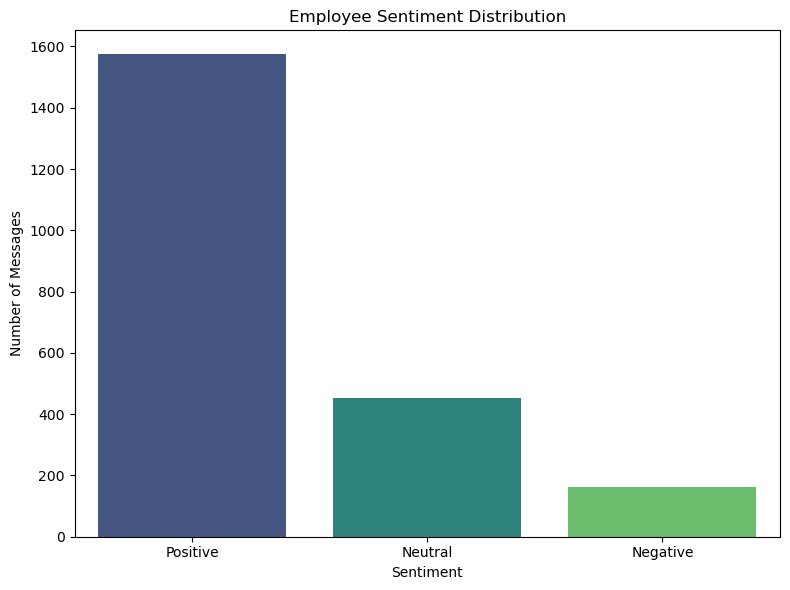

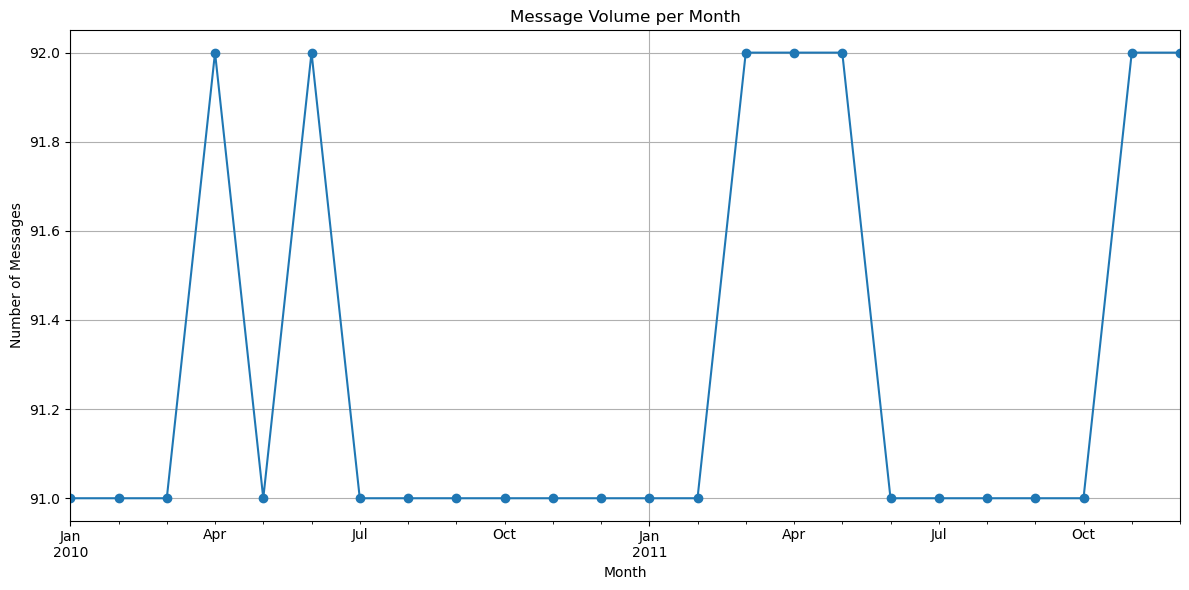

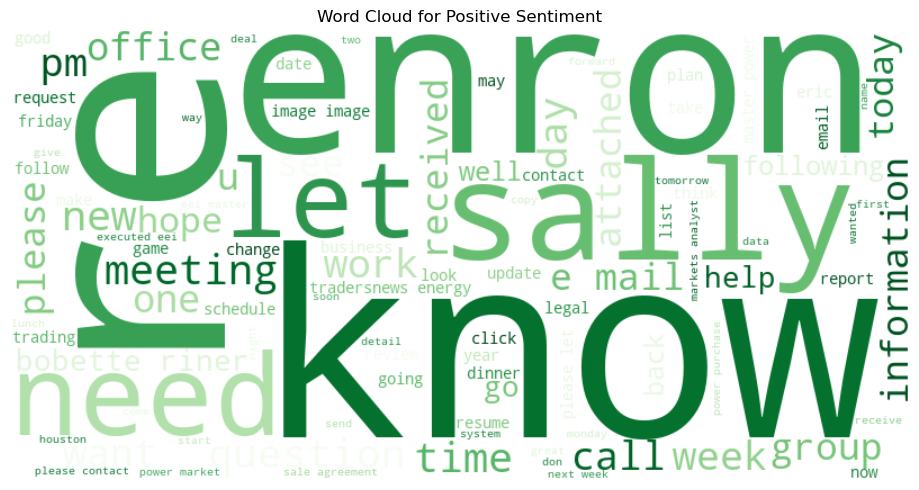

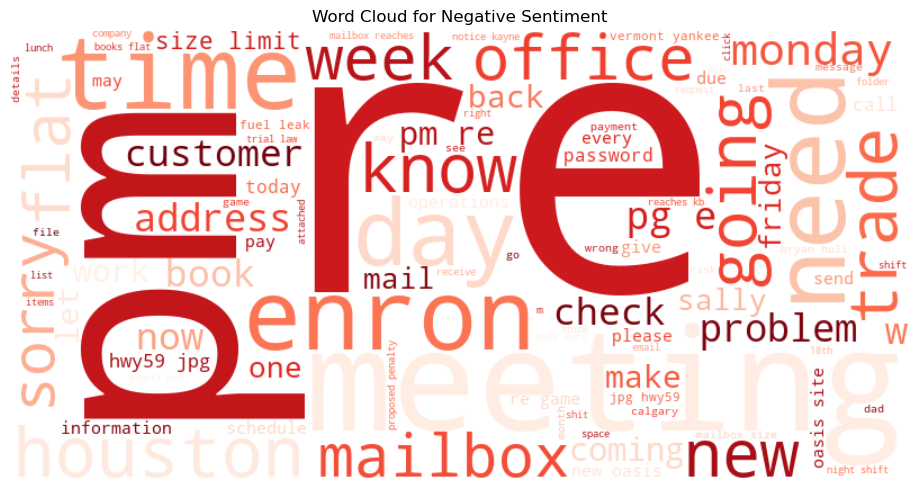

In [8]:
# --- 2. Visualization ---

# Visualization 1: Sentiment Distribution
print("\nCreating Visualization 1: Sentiment Distribution...")
plt.figure(figsize=(8, 6))
sns.countplot(x=output_col, data=df, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Employee Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.savefig('1_sentiment_distribution.png')
# plt.show() # Commented out to prevent stopping automatic execution
print("Visualization saved as 1_sentiment_distribution.png")

# Visualization 2: Number of Messages per Month
print("\nCreating Visualization 2: Message Volume per Month...")
df_time = df.copy()
df_time.set_index(date_col, inplace=True)
monthly_counts = df_time.resample('M').size()
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Message Volume per Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.tight_layout()
plt.savefig('2_messages_over_time.png')
# plt.show()
print("Visualization saved as 2_messages_over_time.png")

# Visualization 3: Word Clouds
print("\nCreating Visualization 3: Word Clouds...")
def generate_wordcloud(data, sentiment_value, color_map):
    """Function to create a word cloud."""
    text = ' '.join(data[data[output_col] == sentiment_value][analysis_col])
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.lower()
    
    custom_stopwords = set(STOPWORDS)
    custom_stopwords.update(['hi', 'hello', 'team', 'regards', 'thanks', 'thank', 'you', 'best', 'will', 'sent', 'cc', 'subject', 'body'])
    
    if len(text.strip()) > 0:
        wordcloud = WordCloud(
            stopwords=custom_stopwords, background_color='white', width=800, height=400,
            colormap=color_map, max_words=100
        ).generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_value} Sentiment')
        plt.tight_layout()
        filename = f'3_wordcloud_{sentiment_value.lower()}.png'
        plt.savefig(filename)
        # plt.show()
        print(f"Word cloud for {sentiment_value} saved as {filename}")
    else:
        print(f"Not enough data to create a word cloud for {sentiment_value} sentiment.")

generate_wordcloud(df, 'Positive', 'Greens')
generate_wordcloud(df, 'Negative', 'Reds')

Data successfully loaded and processed.

Calculating monthly sentiment score...
Average Sentiment Score per Month:
date
2010-01-31    0.637363
2010-02-28    0.527473
2010-03-31    0.527473
2010-04-30    0.630435
2010-05-31    0.604396
Freq: M, Name: Sentiment Score, dtype: float64

Creating Visualization 4: Monthly Sentiment Score Trend...


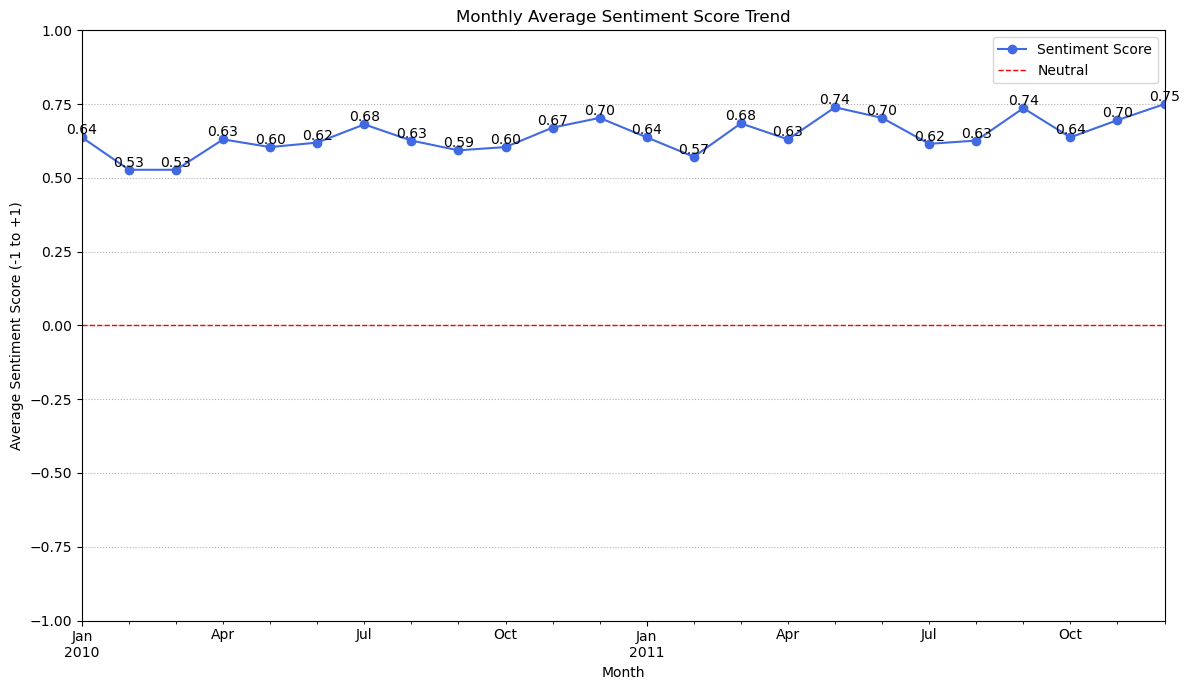

Visualization saved as 4_monthly_sentiment_trend.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# --- Sentiment Labeling Function ---
sia = SentimentIntensityAnalyzer()
def get_sentiment_label(text):
    scores = sia.polarity_scores(str(text))
    if scores['compound'] >= 0.05: return 'Positive'
    elif scores['compound'] <= -0.05: return 'Negative'
    else: return 'Neutral'

# --- Main Variables ---
input_file = 'test(in).csv'
date_col = 'date'
output_col = 'Sentiment'
score_col = 'Sentiment Score'

# --- 1. Load and Process Data ---
try:
    df = pd.read_csv(input_file)
    # Combine 'Subject' and 'body'
    df['full_text'] = df['Subject'].fillna('') + ' ' + df['body'].fillna('')
    # Get sentiment labels
    df[output_col] = df['full_text'].apply(get_sentiment_label)
    # Convert date column
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df.dropna(subset=[date_col], inplace=True)
    print("Data successfully loaded and processed.")
except (FileNotFoundError, KeyError) as e:
    print(f"Error while loading data: {e}")
    exit()

# --- 2. Calculate Monthly Sentiment Score ---
print("\nCalculating monthly sentiment score...")

# Mapping labels to numerical scores
sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df[score_col] = df[output_col].map(sentiment_score_map)

# Set date as the index for resampling
df_monthly = df.set_index(date_col)

# Calculate the average score per month
monthly_sentiment_score = df_monthly[score_col].resample('M').mean()

print("Average Sentiment Score per Month:")
print(monthly_sentiment_score.head())


# --- 3. Visualize Monthly Score ---
print("\nCreating Visualization 4: Monthly Sentiment Score Trend...")
plt.figure(figsize=(12, 7))
monthly_sentiment_score.plot(kind='line', marker='o', color='royalblue')

# Add a horizontal line at y=0 as a neutral baseline
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Neutral')

# Add value labels to each point
for date, score in monthly_sentiment_score.items():
    plt.text(date, score, f'{score:.2f}', ha='center', va='bottom')

plt.title('Monthly Average Sentiment Score Trend')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score (-1 to +1)')
plt.legend()
plt.grid(axis='y', linestyle=':')
plt.ylim(-1, 1) # Set y-axis limits for consistency
plt.tight_layout()

# Save the visualization
output_filename = '4_monthly_sentiment_trend.png'
plt.savefig(output_filename)
plt.show()

print(f"Visualization saved as {output_filename}")

In [4]:
import pandas as pd

# --- Functions from Previous Steps ---
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    scores = sia.polarity_scores(str(text))
    if scores['compound'] >= 0.05: return 'Positive'
    elif scores['compound'] <= -0.05: return 'Negative'
    else: return 'Neutral'

# --- Main Variables ---
input_file = 'test(in).csv'
employee_col = 'from'
output_col = 'Sentiment'
score_col = 'Sentiment Score'

# --- 1. Load and Process Data ---
try:
    df = pd.read_csv(input_file)
    df['full_text'] = df['Subject'].fillna('') + ' ' + df['body'].fillna('')
    df[output_col] = df['full_text'].apply(get_sentiment_label)
    
    # Map labels to numerical scores
    sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    df[score_col] = df[output_col].map(sentiment_score_map)
    
    print("Data successfully loaded and processed.")
except (FileNotFoundError, KeyError) as e:
    print(f"Error while loading data: {e}")
    exit()

# --- 2. Aggregate and Rank Employees ---
print("\nPerforming employee aggregation and ranking...")

# Create a pivot table to count the number of each sentiment type per employee
sentiment_counts = df.pivot_table(index=employee_col, columns=output_col, values='full_text', aggfunc='count', fill_value=0)

# Calculate average score and total messages
employee_ranking = df.groupby(employee_col).agg(
    Average_Sentiment_Score=(score_col, 'mean'),
    Total_Messages=(score_col, 'count')
)

# Merge the two tables
employee_ranking = employee_ranking.merge(sentiment_counts, left_index=True, right_index=True, how='left')

# Ensure 'Positive', 'Negative', 'Neutral' columns exist
# (some might not exist if an employee never sent that type of sentiment)
for col in ['Positive', 'Negative', 'Neutral']:
    if col not in employee_ranking.columns:
        employee_ranking[col] = 0

# Reorder columns for better readability
employee_ranking = employee_ranking[['Total_Messages', 'Positive', 'Neutral', 'Negative', 'Average_Sentiment_Score']]

# --- 3. Display Results ---

# Display Most Positive Employees
top_positive = employee_ranking.sort_values(by='Average_Sentiment_Score', ascending=False)
print("\n--- TOP 3 MOST POSITIVE EMPLOYEES ---")
print(top_positive.head(3))

# Display Most Negative Employees
top_negative = employee_ranking.sort_values(by='Average_Sentiment_Score', ascending=True)
print("\n--- TOP 3 MOST NEGATIVE EMPLOYEES ---")
print(top_negative.head(3))

# Save the complete ranking results to CSV
output_filename = '5_employee_sentiment_ranking.csv'
employee_ranking.to_csv(output_filename)
print(f"\nComplete ranking results saved to file: {output_filename}")

Data successfully loaded and processed.

Performing employee aggregation and ranking...

--- TOP 3 MOST POSITIVE EMPLOYEES ---
                         Total_Messages  Positive  Neutral  Negative  \
from                                                                   
john.arnold@enron.com               256       193       52        11   
eric.bass@enron.com                 210       160       36        14   
lydia.delgado@enron.com             284       203       67        14   

                         Average_Sentiment_Score  
from                                              
john.arnold@enron.com                   0.710938  
eric.bass@enron.com                     0.695238  
lydia.delgado@enron.com                 0.665493  

--- TOP 3 MOST NEGATIVE EMPLOYEES ---
                             Total_Messages  Positive  Neutral  Negative  \
from                                                                       
bobette.riner@ipgdirect.com             217       148       47    

In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# --- Initial Setup and Functions ---
sia = SentimentIntensityAnalyzer()
def get_sentiment_label(text):
    scores = sia.polarity_scores(str(text))
    if scores['compound'] >= 0.05: return 'Positive'
    elif scores['compound'] <= -0.05: return 'Negative'
    else: return 'Neutral'

# --- Main Variables ---
input_file = 'test(in).csv'
employee_col = 'from'
date_col = 'date'
score_col = 'Sentiment Score'
MIN_MESSAGES_FOR_TREND = 10 # Minimum number of messages for trend analysis

# --- 1. Load and Process Data ---
try:
    df = pd.read_csv(input_file)
    df['full_text'] = df['Subject'].fillna('') + ' ' + df['body'].fillna('')
    df['Sentiment'] = df['full_text'].apply(get_sentiment_label)
    sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    df[score_col] = df['Sentiment'].map(sentiment_score_map)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df.dropna(subset=[date_col, employee_col], inplace=True)
    df = df.sort_values(by=date_col)
    print("Data successfully loaded and processed.")
except (FileNotFoundError, KeyError) as e:
    print(f"Error while loading data: {e}")
    exit()

# --- 2. Feature Engineering for Each Employee ---
print("\nAnalyzing trends and behavior for each employee...")

# Create a numerical feature for time (days since the first message)
df['days_since_start'] = (df[date_col] - df[date_col].min()).dt.days

def calculate_employee_metrics(group):
    """Calculates flight risk metrics for one employee group."""
    # Only calculate trend if there is enough data
    if len(group) >= MIN_MESSAGES_FOR_TREND:
        # 1. Sentiment Trend (Slope)
        slope, _, _, _, _ = stats.linregress(group['days_since_start'], group[score_col])
    else:
        slope = 0 # No trend if data is insufficient

    # 2. Overall Average Sentiment
    avg_sentiment = group[score_col].mean()
    
    # 3. Communication Volume Change (last 90 days vs. before)
    latest_date = df[date_col].max()
    ninety_days_ago = latest_date - pd.Timedelta(days=90)
    
    recent_messages = group[group[date_col] > ninety_days_ago].shape[0]
    previous_messages = group[group[date_col] <= ninety_days_ago].shape[0]
    
    # Avoid division by zero
    if previous_messages > 0:
        # Calculate messages per day for normalization
        days_in_previous_period = (ninety_days_ago - group[date_col].min()).days
        if days_in_previous_period <= 0: days_in_previous_period = 1 # avoid zero
        
        prev_rate = previous_messages / days_in_previous_period
        recent_rate = recent_messages / 90
        volume_change_ratio = recent_rate / prev_rate if prev_rate > 0 else 1.0
    else:
        volume_change_ratio = 1.0 # Assumed no change if there is no prior data
        
    return pd.Series({
        'sentiment_trend_slope': slope,
        'average_sentiment': avg_sentiment,
        'message_volume_ratio': volume_change_ratio,
        'total_messages': len(group)
    })

# Apply the function to each employee group
risk_features = df.groupby(employee_col).apply(calculate_employee_metrics)

# --- 3. Calculate Flight Risk Score ---
print("Calculating Flight Risk Score...")

# Normalize features (0-1). A higher score indicates higher risk.
# 1. Sentiment Trend: Convert slope to risk score (negative slope -> high score)
risk_features['trend_risk'] = -risk_features['sentiment_trend_slope']
risk_features['trend_risk'] = (risk_features['trend_risk'] - risk_features['trend_risk'].min()) / \
                              (risk_features['trend_risk'].max() - risk_features['trend_risk'].min())

# 2. Average Sentiment: Convert sentiment to risk score (low sentiment -> high score)
risk_features['sentiment_risk'] = -risk_features['average_sentiment']
risk_features['sentiment_risk'] = (risk_features['sentiment_risk'] - risk_features['sentiment_risk'].min()) / \
                                  (risk_features['sentiment_risk'].max() - risk_features['sentiment_risk'].min())

# 3. Communication Volume: Convert volume ratio to risk score (low ratio -> high score)
# Note: A drop in volume (ratio < 1) is a risk. We can invert the ratio for the score.
# To prevent division by zero and handle ratios > 1, we use a custom logic.
# A simple way is -ratio, so lower ratios get higher risk scores after normalization.
risk_features['volume_risk'] = -risk_features['message_volume_ratio']
risk_features['volume_risk'] = (risk_features['volume_risk'] - risk_features['volume_risk'].min()) / \
                               (risk_features['volume_risk'].max() - risk_features['volume_risk'].min())
                               
# Replace potential NaN values with 0 (can occur if there's only one employee or no variance)
risk_features.fillna(0, inplace=True)

# Assign weights to each risk factor
W_TREND = 0.5      # Sentiment trend is the strongest indicator
W_SENTIMENT = 0.3
W_VOLUME = 0.2

risk_features['Flight_Risk_Score'] = (W_TREND * risk_features['trend_risk'] +
                                      W_SENTIMENT * risk_features['sentiment_risk'] +
                                      W_VOLUME * risk_features['volume_risk'])

# --- 4. Display Results ---
flight_risk_results = risk_features.sort_values(by='Flight_Risk_Score', ascending=False)

print("\n--- TOP 5 EMPLOYEES WITH THE HIGHEST FLIGHT RISK ---")
print(flight_risk_results[['total_messages', 'sentiment_trend_slope', 'average_sentiment', 'Flight_Risk_Score']].head(5))

# Save the complete results
output_filename = '6_flight_risk_analysis.csv'
flight_risk_results.to_csv(output_filename)
print(f"\nComplete flight risk analysis results saved to: {output_filename}")

Data successfully loaded and processed.

Analyzing trends and behavior for each employee...
Calculating Flight Risk Score...

--- TOP 5 EMPLOYEES WITH THE HIGHEST FLIGHT RISK ---
                         total_messages  sentiment_trend_slope  \
from                                                             
sally.beck@enron.com              227.0               0.000040   
johnny.palmer@enron.com           213.0               0.000120   
eric.bass@enron.com               210.0              -0.000200   
rhonda.denton@enron.com           172.0              -0.000054   
don.baughman@enron.com            213.0               0.000074   

                         average_sentiment  Flight_Risk_Score  
from                                                           
sally.beck@enron.com              0.590308           0.751911  
johnny.palmer@enron.com           0.615023           0.678863  
eric.bass@enron.com               0.695238           0.668098  
rhonda.denton@enron.com           0.66

Data successfully loaded and processed.

Preparing data for the linear regression model...
Training the model...

--- Linear Regression Model Results ---
Coefficient (Slope): 0.000170
Intercept: 0.5822
Model Formula: Sentiment = 0.000170 * (Days Since Start) + 0.5822
Interpretation: The model shows a POSITIVE sentiment trend (improving) over time.

Creating Visualization 7: Overall Sentiment Trend with Regression Model...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


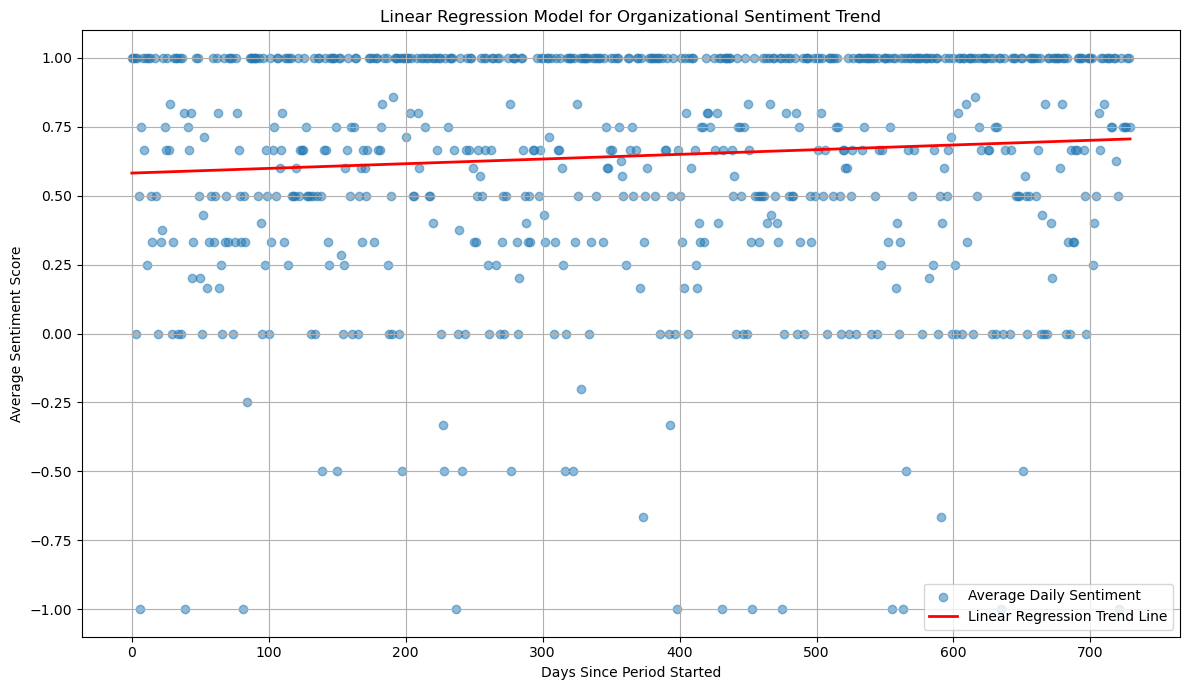

Visualization saved as 7_overall_sentiment_trend_model.png


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# --- Initial Setup and Functions ---
sia = SentimentIntensityAnalyzer()
def get_sentiment_label(text):
    scores = sia.polarity_scores(str(text))
    if scores['compound'] >= 0.05: return 'Positive'
    elif scores['compound'] <= -0.05: return 'Negative'
    else: return 'Neutral'

# --- Main Variables ---
input_file = 'test(in).csv'
date_col = 'date'
score_col = 'Sentiment Score'

# --- 1. Load and Process Data ---
try:
    df = pd.read_csv(input_file)
    df['full_text'] = df['Subject'].fillna('') + ' ' + df['body'].fillna('')
    df['Sentiment'] = df['full_text'].apply(get_sentiment_label)
    sentiment_score_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    df[score_col] = df['Sentiment'].map(sentiment_score_map)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df.dropna(subset=[date_col], inplace=True)
    df = df.sort_values(by=date_col)
    print("Data successfully loaded and processed.")
except (FileNotFoundError, KeyError) as e:
    print(f"Error while loading data: {e}")
    exit()

# --- 2. Preparing Data for the Model ---
print("\nPreparing data for the linear regression model...")
# Create a numerical time feature
df['days_since_start'] = (df[date_col] - df[date_col].min()).dt.days

# Define X (features) and y (target)
X = df[['days_since_start']] # Features must be in a 2D array format
y = df[score_col]

# --- 3. Train the Linear Regression Model ---
print("Training the model...")
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print("\n--- Linear Regression Model Results ---")
print(f"Coefficient (Slope): {slope:.6f}")
print(f"Intercept: {intercept:.4f}")
print(f"Model Formula: Sentiment = {slope:.6f} * (Days Since Start) + {intercept:.4f}")

if slope > 0:
    print("Interpretation: The model shows a POSITIVE sentiment trend (improving) over time.")
elif slope < 0:
    print("Interpretation: The model shows a NEGATIVE sentiment trend (worsening) over time.")
else:
    print("Interpretation: The model does not show a significant sentiment trend.")


# --- 4. Visualize Model Results ---
print("\nCreating Visualization 7: Overall Sentiment Trend with Regression Model...")

# Aggregate data to get the average daily sentiment (for a cleaner visualization)
daily_avg_sentiment = df.groupby('days_since_start')[score_col].mean().reset_index()

# Create predictions using the range of days
X_pred = np.array(range(df['days_since_start'].max() + 1)).reshape(-1, 1)
y_pred = model.predict(X_pred)

plt.figure(figsize=(12, 7))
# Scatter plot of average daily sentiment
plt.scatter(daily_avg_sentiment['days_since_start'], daily_avg_sentiment[score_col],
            alpha=0.5, label='Average Daily Sentiment')

# Regression line from the model
plt.plot(X_pred, y_pred, color='red', linewidth=2, label='Linear Regression Trend Line')

plt.title('Linear Regression Model for Organizational Sentiment Trend')
plt.xlabel('Days Since Period Started')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the visualization
output_filename = '7_overall_sentiment_trend_model.png'
plt.savefig(output_filename)
plt.show()

print(f"Visualization saved as {output_filename}")